In [1]:
import adi
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import scipy as sp
import pandas as pd
from scipy.fft import fft, ifft
from FMCW import FMCW
import seaborn as sns

In [2]:
sns.set()
sdr = adi.ad9361(uri='ip:192.168.2.1')
radar = FMCW(sdr)


In [3]:
x, y = radar.get_range_burst()

In [4]:
mixed = radar.get_mixed_burst()

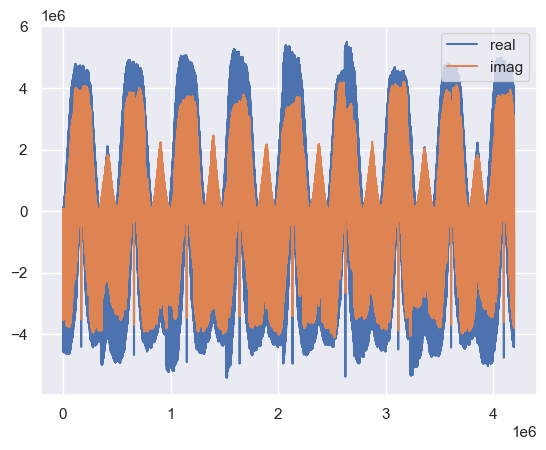

In [5]:
plt.plot(mixed.real)
plt.plot(mixed.imag)
plt.legend(["real", "imag"], loc='upper right')
plt.show()

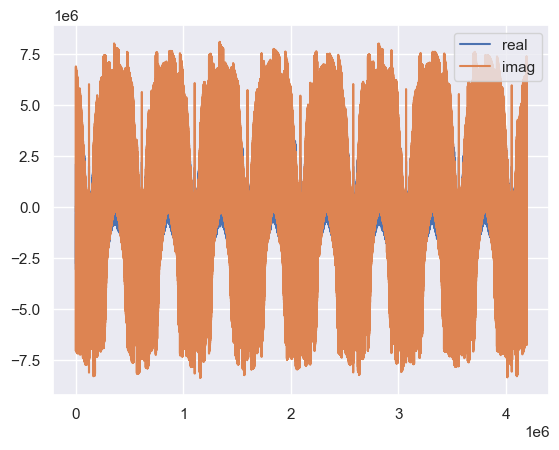

In [6]:
x2, y2 = radar.get_range_burst()
mixed2 = radar.get_mixed_burst()
plt.plot(mixed2.real)
plt.plot(mixed2.imag)
plt.legend(["real", "imag"], loc='upper right')
plt.show()

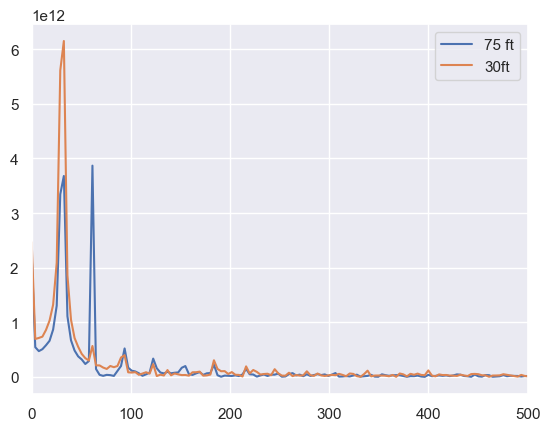

In [8]:
plt.plot(x, np.abs(y))
plt.plot(x2, y2)
plt.xlim(0, 500)
plt.legend(["75 ft", "30ft"], loc='upper right')
plt.show()

In [ ]:
# change cable length
x2, y2 = radar.get_range_burst()
plt.plot(x, np.abs(y))
plt.plot(x2, np.abs(y2))
plt.xlim(0, 500)
plt.legend(["Longer", "Shorter"])
plt.show()

In [ ]:
sr = sdr.sample_rate
x = mixed

X = fft(x)

N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

#plt.stem(freq, np.abs(X), 'b', \
#         markerfmt=" ", basefmt="-b")
plt.stem(freq, np.abs(X))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 1000)
plt.show()

In [ ]:
signal.find_peaks(np.abs(X))